In [1]:
import os
os.chdir('drive/My Drive/MLProject_20202')

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

import matplotlib.pyplot as plt
import sklearn
import matplotlib as mpl
from tensorflow import keras

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
names = ['SVM', 'RandomForest', 'LogisticRegression', 'XGBoost', 'NeuralNetwork']

In [5]:
df = pd.read_csv('Data/Test data/data_LSTM.csv')
y = df.iloc[:, -1:]
y = y.to_numpy()

Benchmark for LSTM

In [6]:
df_lstm = pd.read_csv('Data/Test data/data_LSTM.csv')
X_lstm = df_lstm.iloc[:, :-1]

In [7]:
lstm_svm = pickle.load(open('Model/LSTM/Classification/LSTM_svm.pkl', 'rb'))
lstm_rf = pickle.load(open('Model/LSTM/Classification/LSTM_rf.pkl', 'rb'))
lstm_lr = pickle.load(open('Model/LSTM/Classification/LSTM_logistic.pkl', 'rb'))
lstm_xgb = pickle.load(open('Model/LSTM/Classification/LSTM_xgboost.pkl', 'rb'))

lstm_nn = keras.models.load_model('Model/LSTM/Classification/NN_LSTM')

In [8]:
lstm_svm_pred = lstm_svm.predict(X_lstm)
lstm_rf_pred = lstm_rf.predict(X_lstm)
lstm_lr_pred = lstm_lr.predict(X_lstm)
lstm_xgb_pred = lstm_xgb.predict(X_lstm)
lstm_nn_pred = lstm_nn.predict(X_lstm)

In [9]:
lstm_preds = [lstm_svm_pred, lstm_rf_pred, lstm_lr_pred, lstm_xgb_pred, lstm_nn_pred]

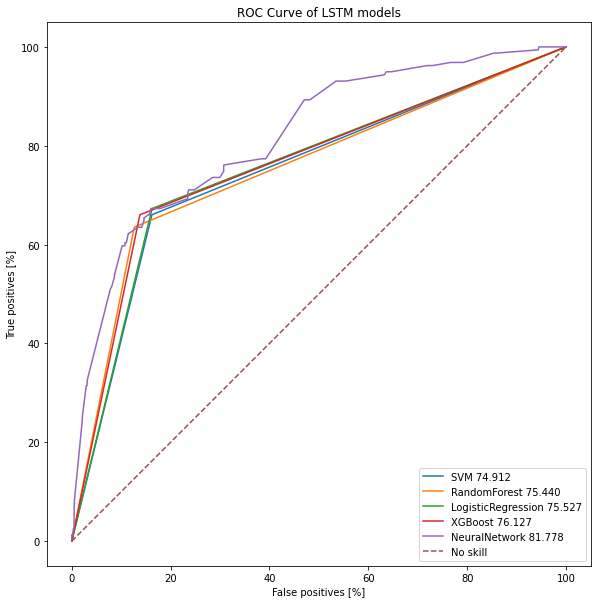

In [10]:
i = 0
for name, pred in zip(names, lstm_preds):
    fp, tp, _ = sklearn.metrics.roc_curve(y, pred)

    roc_score = sklearn.metrics.roc_auc_score(y, pred)
    str_score = str('{:.3f}'.format(100*roc_score))
    plt.plot(100*fp, 100*tp, label=name + " " + str_score, color = colors[i])
    i = i + 1
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    ax = plt.gca()
    ax.set_aspect('equal')

ns_pred = [0 for _ in range(len(y))]
fns, tns, _ = sklearn.metrics.roc_curve(y, ns_pred)
plt.plot(100*fns, 100*tns, label='No skill', linestyle='--', color=colors[i])
plt.legend(loc='lower right')
plt.title('ROC Curve of LSTM models')
plt.savefig(f'Image/LSTM_roc_curve.png')
plt.show()

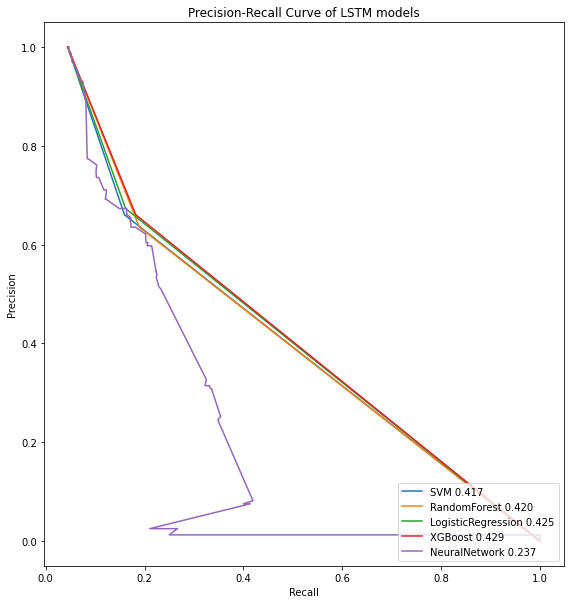

In [11]:
i = 0
for name, pred in zip(names, lstm_preds):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y, pred)

    auc = sklearn.metrics.auc(recall, precision)
    str_auc = str('{:.3f}'.format(auc))
    plt.plot(precision, recall, label=name + " " + str_auc, color = colors[i])
    # average_precision = sklearn.metrics.average_precision_score(y, pred)
    # str_avg = str('{:.3f}'.format(100*average_precision))
    # plt.plot(precision, recall, label=name + " " + str_avg, color = colors[i])
    i = i + 1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    ax = plt.gca()
    ax.set_aspect('equal')

plt.legend(loc='lower right')
plt.title('Precision-Recall Curve of LSTM models')
plt.savefig(f'Image/LSTM_precision_curve.png')
plt.show()

Benchmark for BiLSTM

In [12]:
df_bilstm = pd.read_csv('Data/Test data/data_BiLSTM.csv')
X_bilstm = df_bilstm.iloc[:, :-1]

In [13]:
bilstm_svm = pickle.load(open('Model/LSTM/Classification/BiLSTM_svm.pkl', 'rb'))
bilstm_rf = pickle.load(open('Model/LSTM/Classification/BiLSTM_rf.pkl', 'rb'))
bilstm_lr = pickle.load(open('Model/LSTM/Classification/BiLSTM_logistic.pkl', 'rb'))
bilstm_xgb = pickle.load(open('Model/LSTM/Classification/BiLSTM_xgboost.pkl', 'rb'))

bilstm_nn = keras.models.load_model('Model/LSTM/Classification/NN_BiLSTM')

In [14]:
bilstm_svm_pred = bilstm_svm.predict(X_bilstm)
bilstm_rf_pred = bilstm_rf.predict(X_bilstm)
bilstm_lr_pred = bilstm_lr.predict(X_bilstm)
bilstm_xgb_pred = bilstm_xgb.predict(X_bilstm)
bilstm_nn_pred = bilstm_nn.predict(X_bilstm)

In [15]:
bilstm_preds = [bilstm_svm_pred, bilstm_rf_pred, bilstm_lr_pred, bilstm_xgb_pred, bilstm_nn_pred]

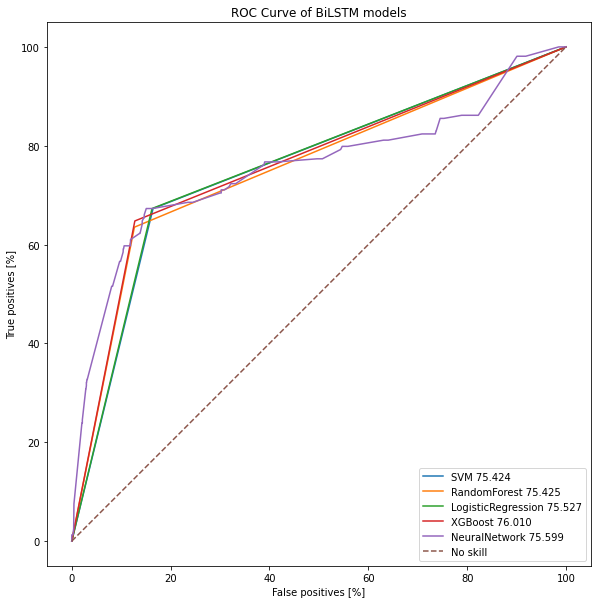

In [16]:
i = 0
for name, pred in zip(names, bilstm_preds):
    fp, tp, _ = sklearn.metrics.roc_curve(y, pred)

    roc_score = sklearn.metrics.roc_auc_score(y, pred)
    str_score = str('{:.3f}'.format(100*roc_score))
    plt.plot(100*fp, 100*tp, label=name + " " + str_score, color = colors[i])
    i = i + 1
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    ax = plt.gca()
    ax.set_aspect('equal')

ns_pred = [0 for _ in range(len(y))]
fns, tns, _ = sklearn.metrics.roc_curve(y, ns_pred)
plt.plot(100*fns, 100*tns, label='No skill', linestyle='--', color=colors[i])
plt.legend(loc='lower right')
plt.title('ROC Curve of BiLSTM models')
plt.savefig(f'Image/BiLSTM_roc_curve.png')
plt.show()

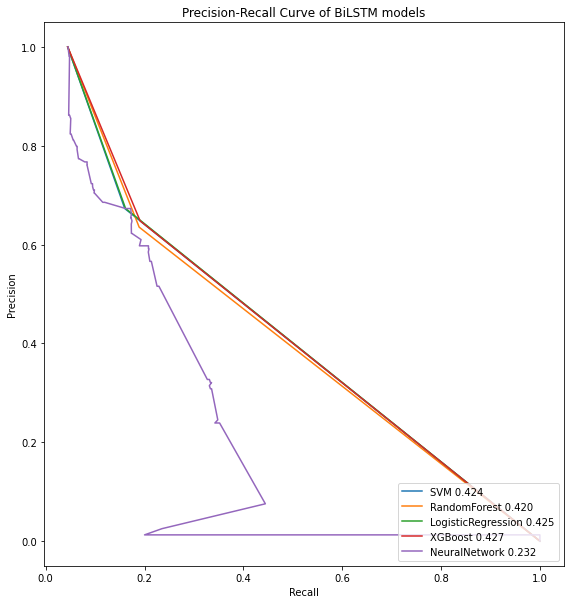

In [17]:
i = 0
for name, pred in zip(names, bilstm_preds):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y, pred)

    auc = sklearn.metrics.auc(recall, precision)
    str_auc = str('{:.3f}'.format(auc))
    plt.plot(precision, recall, label=name + " " + str_auc, color = colors[i])
    # average_precision = sklearn.metrics.average_precision_score(y, pred)
    # str_avg = str('{:.3f}'.format(100*average_precision))
    # plt.plot(precision, recall, label=name + " " + str_avg, color = colors[i])
    i = i + 1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    ax = plt.gca()
    ax.set_aspect('equal')

plt.legend(loc='lower right')
plt.title('Precision-Recall Curve of BiLSTM models')
plt.savefig(f'Image/BiLSTM_precision_curve.png')
plt.show()

Benchmark for DM

In [18]:
df_dm = pd.read_csv('Data/Test data/data_DM.csv')
X_dm = df_dm.iloc[:, :-1]

In [19]:
dm_svm = pickle.load(open('Model/Doc2Vec/Classification/DM_svm.pkl', 'rb'))
dm_rf = pickle.load(open('Model/Doc2Vec/Classification/DM_rf.pkl', 'rb'))
dm_lr = pickle.load(open('Model/Doc2Vec/Classification/DM_logistic.pkl', 'rb'))
dm_xgb = pickle.load(open('Model/Doc2Vec/Classification/DM_xgboost.pkl', 'rb'))

dm_nn = keras.models.load_model('Model/Doc2Vec/Classification/NN_DM')

In [20]:
dm_svm_pred = dm_svm.predict(X_dm)
dm_rf_pred = dm_rf.predict(X_dm)
dm_lr_pred = dm_lr.predict(X_dm)
dm_xgb_pred = dm_xgb.predict(X_dm)
dm_nn_pred = dm_nn.predict(X_dm)

In [21]:
dm_preds = [dm_svm_pred, dm_rf_pred, dm_lr_pred, dm_xgb_pred, dm_nn_pred]

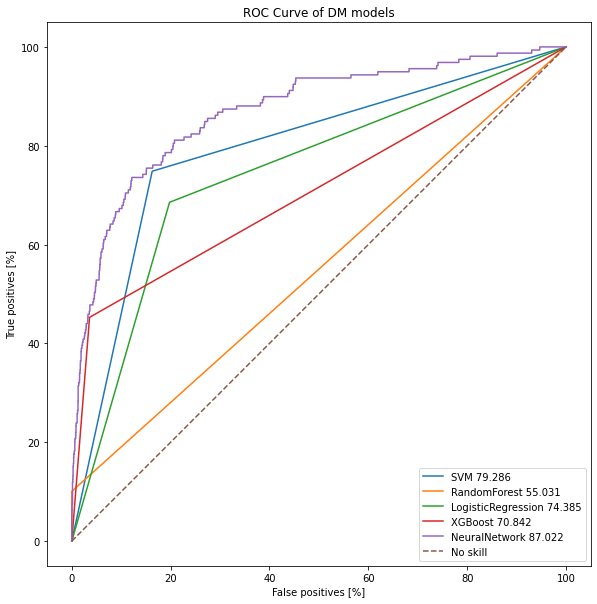

In [22]:
i = 0
for name, pred in zip(names, dm_preds):
    fp, tp, _ = sklearn.metrics.roc_curve(y, pred)

    roc_score = sklearn.metrics.roc_auc_score(y, pred)
    str_score = str('{:.3f}'.format(100*roc_score))
    plt.plot(100*fp, 100*tp, label=name + " " + str_score, color = colors[i])
    i = i + 1
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    ax = plt.gca()
    ax.set_aspect('equal')

ns_pred = [0 for _ in range(len(y))]
fns, tns, _ = sklearn.metrics.roc_curve(y, ns_pred)
plt.plot(100*fns, 100*tns, label='No skill', linestyle='--', color=colors[i])
plt.legend(loc='lower right')
plt.title('ROC Curve of DM models')
plt.savefig(f'Image/DM_roc_curve.png')
plt.show()

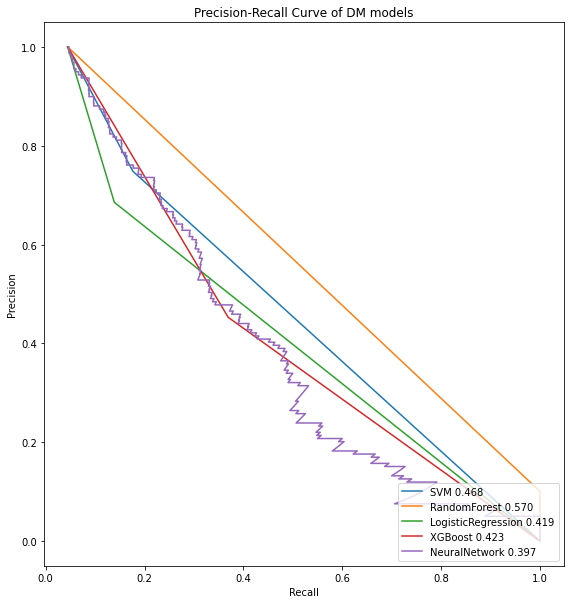

In [23]:
i = 0
for name, pred in zip(names, dm_preds):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y, pred)

    auc = sklearn.metrics.auc(recall, precision)
    str_auc = str('{:.3f}'.format(auc))
    plt.plot(precision, recall, label=name + " " + str_auc, color = colors[i])
    # average_precision = sklearn.metrics.average_precision_score(y, pred)
    # str_avg = str('{:.3f}'.format(100*average_precision))
    # plt.plot(precision, recall, label=name + " " + str_avg, color = colors[i])
    i = i + 1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    ax = plt.gca()
    ax.set_aspect('equal')

plt.legend(loc='lower right')
plt.title('Precision-Recall Curve of DM models')
plt.savefig(f'Image/DM_precision_curve.png')
plt.show()

Benchmark for DBOW

In [24]:
df_dbow = pd.read_csv('Data/Test data/data_DBOW.csv')
X_dbow = df_dbow.iloc[:, :-1]

In [25]:
dbow_svm = pickle.load(open('Model/Doc2Vec/Classification/DBOW_svm.pkl', 'rb'))
dbow_rf = pickle.load(open('Model/Doc2Vec/Classification/DBOW_rf.pkl', 'rb'))
dbow_lr = pickle.load(open('Model/Doc2Vec/Classification/DBOW_logistic.pkl', 'rb'))
dbow_xgb = pickle.load(open('Model/Doc2Vec/Classification/DBOW_xgboost.pkl', 'rb'))

dbow_nn = keras.models.load_model('Model/Doc2Vec/Classification/NN_DBOW')

In [26]:
dbow_svm_pred = dbow_svm.predict(X_dbow)
dbow_rf_pred = dbow_rf.predict(X_dbow)
dbow_lr_pred = dbow_lr.predict(X_dbow)
dbow_xgb_pred = dbow_xgb.predict(X_dbow)
dbow_nn_pred = dbow_nn.predict(X_dbow)

In [27]:
dbow_preds = [dbow_svm_pred, dbow_rf_pred, dbow_lr_pred, dbow_xgb_pred, dbow_nn_pred]

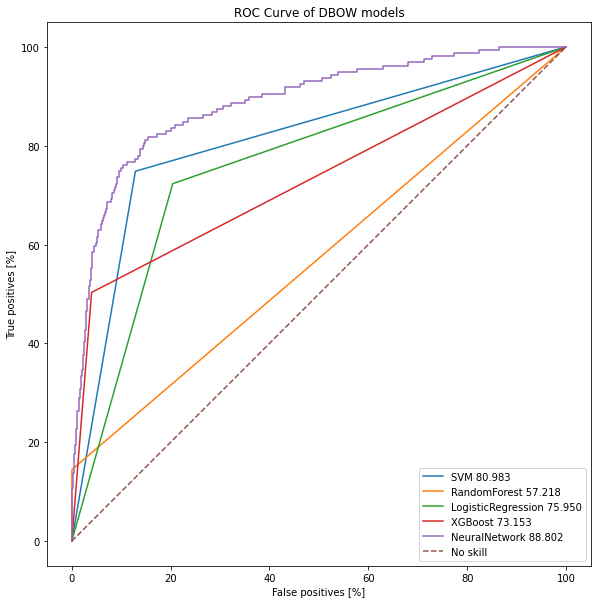

In [28]:
i = 0
for name, pred in zip(names, dbow_preds):
    fp, tp, _ = sklearn.metrics.roc_curve(y, pred)

    roc_score = sklearn.metrics.roc_auc_score(y, pred)
    str_score = str('{:.3f}'.format(100*roc_score))
    plt.plot(100*fp, 100*tp, label=name + " " + str_score, color = colors[i])
    i = i + 1
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    ax = plt.gca()
    ax.set_aspect('equal')

ns_pred = [0 for _ in range(len(y))]
fns, tns, _ = sklearn.metrics.roc_curve(y, ns_pred)
plt.plot(100*fns, 100*tns, label='No skill', linestyle='--', color=colors[i])
plt.legend(loc='lower right')
plt.title('ROC Curve of DBOW models')
plt.savefig(f'Image/DBOW_roc_curve.png')
plt.show()

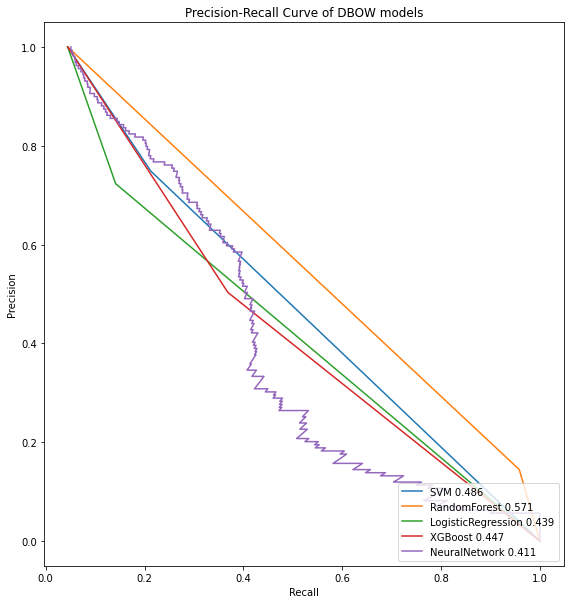

In [29]:
i = 0
for name, pred in zip(names, dbow_preds):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y, pred)

    auc = sklearn.metrics.auc(recall, precision)
    str_auc = str('{:.3f}'.format(auc))
    plt.plot(precision, recall, label=name + " " + str_auc, color = colors[i])
    # average_precision = sklearn.metrics.average_precision_score(y, pred)
    # str_avg = str('{:.3f}'.format(100*average_precision))
    # plt.plot(precision, recall, label=name + " " + str_avg, color = colors[i])
    i = i + 1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    ax = plt.gca()
    ax.set_aspect('equal')

plt.legend(loc='lower right')
plt.title('Precision-Recall Curve of DBOW models')
plt.savefig(f'Image/DBOW_precision_curve.png')
plt.show()

Confusion matrix

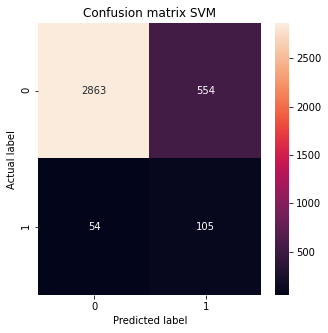

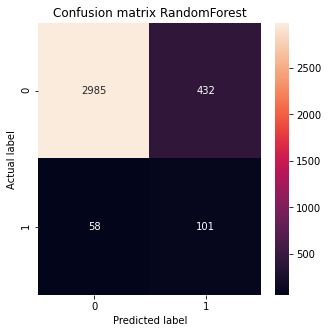

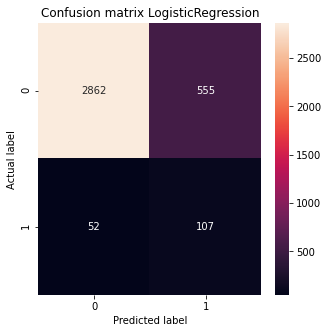

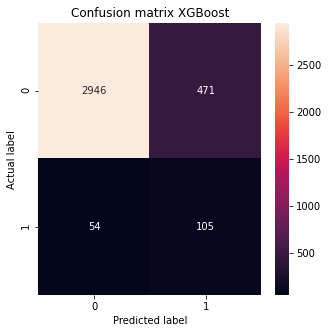

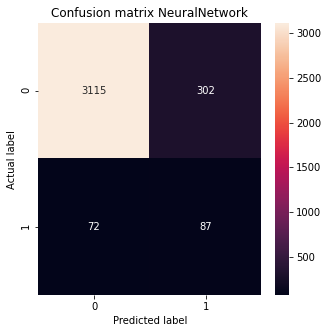

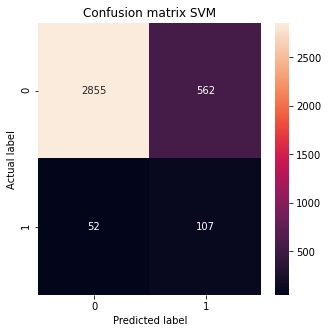

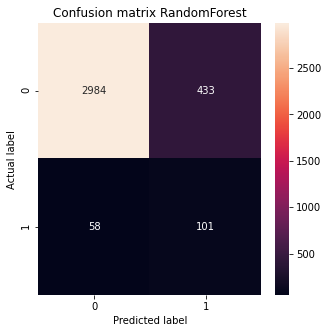

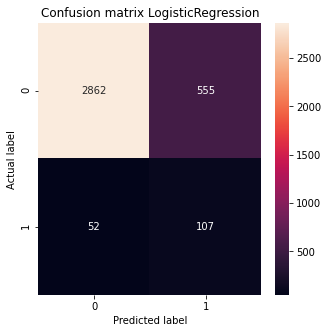

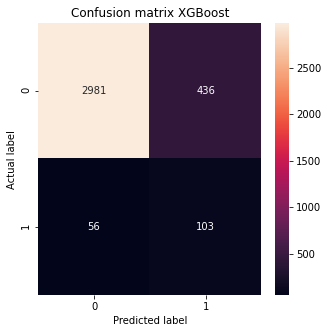

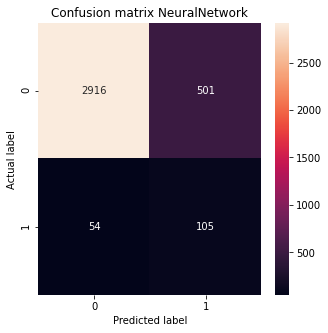

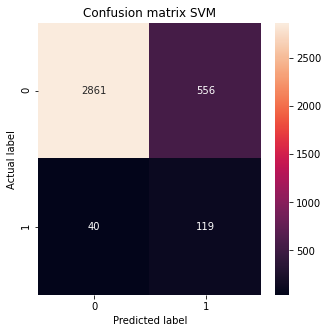

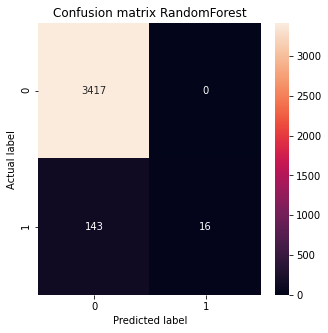

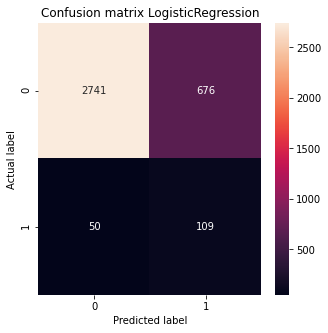

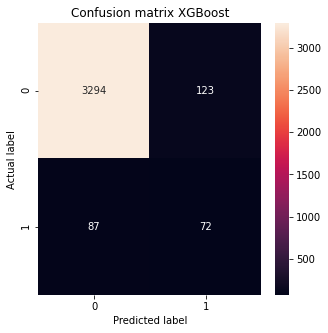

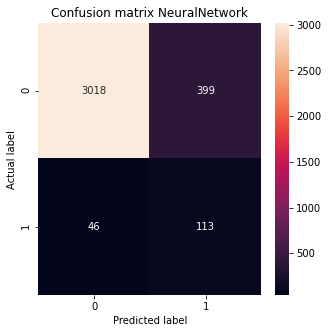

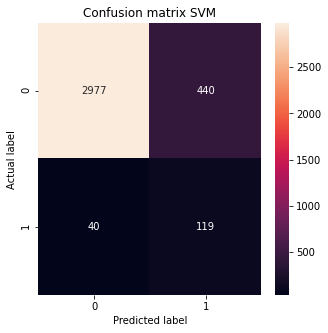

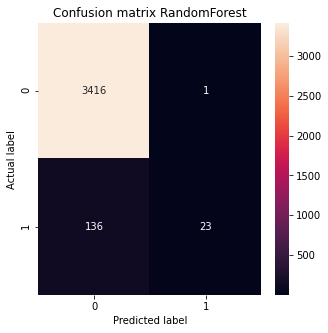

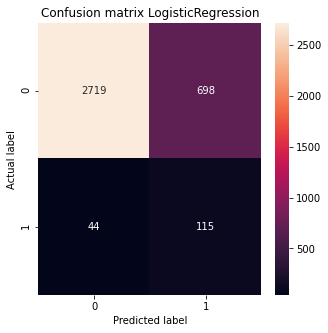

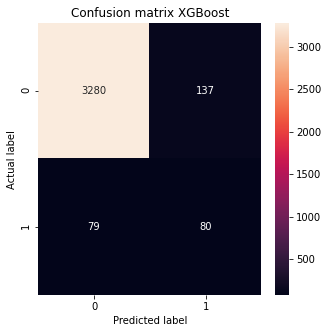

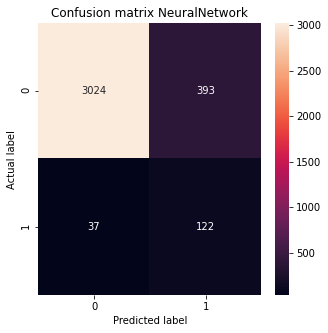

In [30]:
for model in [lstm_preds, bilstm_preds, dm_preds, dbow_preds]:
    for pred, name in zip(model, names):
        cm = confusion_matrix(y, pred > 0.5)
        plt.figure(figsize=(5,5))
        sns.heatmap(cm, annot=True, fmt="d")
        plt.title(f'Confusion matrix {name}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        # plt.savefig(f'Result/LSTM/CM/{clf_dict}_{MODEL_TYPE}_cm.png')
        plt.show()